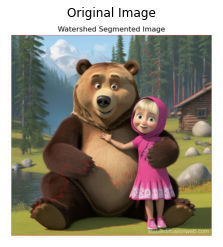

Image reshaped for clustering: (241964, 3)
Cluster centers (dominant colors):
[[ 51  36  24]
 [230 236 240]
 [ 87  86  77]
 [178 145 103]]


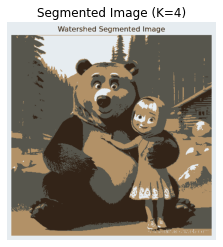

Cluster centers (dominant colors):
[[ 81  73  61]
 [254 253 253]
 [210 149 135]
 [ 43  30  19]
 [178 200 216]
 [165 143  79]
 [ 96 104 100]]


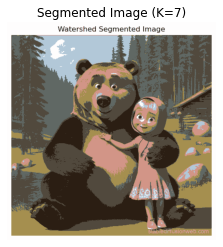

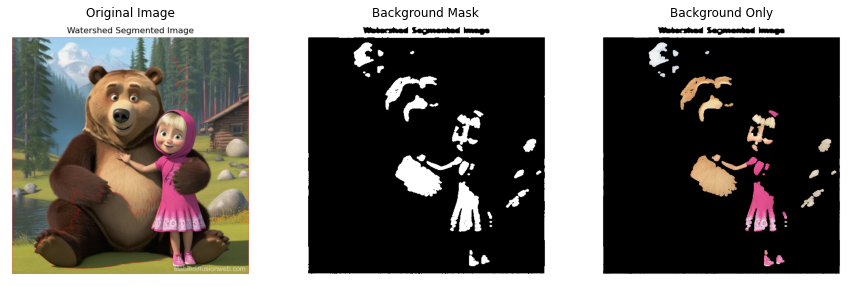

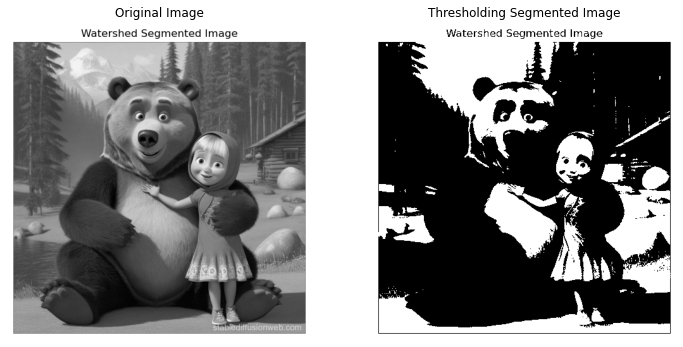

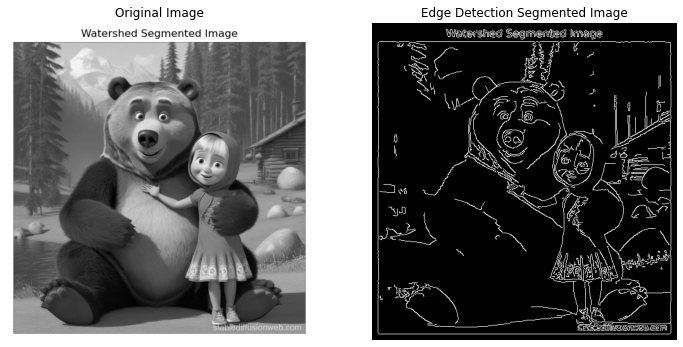

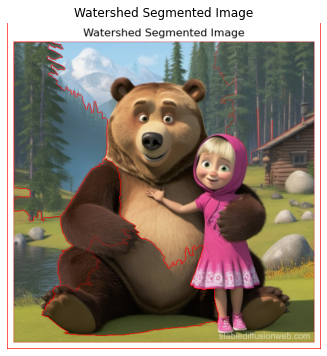

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# load an image and display it
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    return image

# Example usage
image_path = r"C:\Users\Bindushree\Desktop\download (4).png"  # Replace with your image path
original_image = load_image(image_path)

# Display the original image
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")
plt.show()


#flatten the image into a format suitable for clustering
def preprocess_image(image):
    # Reshape the image into a 2D array of pixels and 3 color values (RGB)
    pixel_values = image.reshape((-1, 3))
    # Convert to float for compatibility with KMeans
    pixel_values = np.float32(pixel_values)
    return pixel_values

# Preprocess the image
pixel_values = preprocess_image(original_image)
print(f"Image reshaped for clustering: {pixel_values.shape}")

#cluster the pixel values using K-Means
def apply_kmeans(pixel_values, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_values)
    # Get the cluster centers (dominant colors) and labels
    centers = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_
    return centers, labels

# Apply K-Means with a chosen number of clusters (e.g., 4)
k = 4
centers, labels = apply_kmeans(pixel_values, k)
print(f"Cluster centers (dominant colors):\n{centers}")

#Reconstruct the Segmented Image
def reconstruct_image(labels, centers, original_shape):
    # Map each pixel to its cluster center
    segmented_image = centers[labels.flatten()]
    # Reshape to original image dimensions
    segmented_image = segmented_image.reshape(original_shape)
    return segmented_image

# Reconstruct the segmented image
segmented_image = reconstruct_image(labels, centers, original_image.shape)

# Display the segmented image
plt.imshow(segmented_image)
plt.title(f"Segmented Image (K={k})")
plt.axis("off")
plt.show()

#cluster the pixel values using K-Means
def apply_kmeans(pixel_values, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_values)
    # Get the cluster centers (dominant colors) and labels
    centers = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_
    return centers, labels

# Apply K-Means with a chosen number of clusters (e.g., 4)
k = 7
centers, labels = apply_kmeans(pixel_values, k)
print(f"Cluster centers (dominant colors):\n{centers}")

#Reconstruct the Segmented Image
def reconstruct_image(labels, centers, original_shape):
    # Map each pixel to its cluster center
    segmented_image = centers[labels.flatten()]
    # Reshape to original image dimensions
    segmented_image = segmented_image.reshape(original_shape)
    return segmented_image

# Reconstruct the segmented image
segmented_image = reconstruct_image(labels, centers, original_image.shape)

# Display the segmented image
plt.imshow(segmented_image)
plt.title(f"Segmented Image (K={k})")
plt.axis("off")
plt.show()

import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_background(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Directly use the image without converting to grayscale
    # Apply thresholding to isolate the foreground
    _, binary_mask = cv2.threshold(image[:, :, 0], 200, 255, cv2.THRESH_BINARY_INV)  # Thresholding on one channel (R)

    # Morphological operations to refine the mask (e.g., remove small noise)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

    # Invert the mask to isolate the background
    background_mask = cv2.bitwise_not(binary_mask)

    # Apply the inverted mask to retain only the background
    background = cv2.bitwise_and(image, image, mask=background_mask)

    return image, background_mask, background

# Use a properly formatted file path
image_path = r"C:\Users\Bindushree\Desktop\download (4).png" 

# Perform background extraction
original_image, background_mask, background_image = extract_background(image_path)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(background_mask, cmap="gray")
plt.title("Background Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(background_image)
plt.title("Background Only")
plt.axis("off")

plt.show()

import cv2
import matplotlib.pyplot as plt

# Function for thresholding
def thresholding_segmentation(image_path, threshold_value=127):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale

    # Apply simple thresholding
    _, segmented_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    return image, segmented_image

# Set image path
image_path = r"C:\Users\Bindushree\Desktop\download (4).png" 

# Perform thresholding segmentation
original_image, segmented_image = thresholding_segmentation(image_path)

# Display results
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Segmented Image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title("Thresholding Segmented Image")
plt.axis('off')

plt.show()

import cv2
import matplotlib.pyplot as plt

# Function for edge detection segmentation
def edge_detection_segmentation(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Canny edge detection
    edges = cv2.Canny(image, 100, 200)

    return image, edges

# Set image path
image_path = r"C:\Users\Bindushree\Desktop\download (4).png" 

# Perform edge detection segmentation
original_image, edges_image = edge_detection_segmentation(image_path)

# Display results
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Edge Detection Image
plt.subplot(1, 2, 2)
plt.imshow(edges_image, cmap='gray')
plt.title("Edge Detection Segmented Image")
plt.axis('off')

plt.show()


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform Watershed segmentation
def watershed_segmentation(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

    # Convert to grayscale and apply thresholding
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Remove noise with morphological operations
    kernel = np.ones((3, 3), np.uint8)
    sure_bg = cv2.dilate(thresh, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Convert sure_fg to uint8 to match sure_bg type
    sure_fg = np.uint8(sure_fg)

    # Compute the unknown regions
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labeling
    _, markers = cv2.connectedComponents(sure_fg)

    # Apply watershed algorithm
    markers = markers + 1
    markers[unknown == 255] = 0
    cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]  # Boundary color

    return image

# Set image path (use raw string to avoid escape sequence issues)
image_path = r"C:\Users\Bindushree\Desktop\download (4).png" 

# Perform watershed segmentation
segmented_image = watershed_segmentation(image_path)

# Display the result
plt.figure(figsize=(8, 6))

# Display Watershed Segmented Image
plt.imshow(segmented_image)
plt.title("Watershed Segmented Image")
plt.axis('off')

plt.show()



